In [1]:
%load_ext beam_setup

Setting up the Beam environment for interactive use
Standard modules will be automatically imported so you can use them without explicit import
Done importing packages. It took:  4.8 seconds
Beam library is loaded from path: /home/nir/projects/beam_dev/beamds/notebooks/../src/beam
The Beam version is: 2.3.5


In [2]:
from shap_explainer import ShapTreeExplainer
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [3]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets

y = y['poisonous'].astype('category').cat.codes


In [25]:
model = CatBoostClassifier(iterations=20,
                           learning_rate=0.01,
                           depth=3)

# train model
cat_features = list(range(len(X.columns)))
coded_data = {}
for col in X.columns:
    coded_data[col] = X[col].astype('category').cat.codes

X = pd.DataFrame.from_dict(coded_data)
model.fit(X, y, cat_features)

0:	learn: 0.6660194	total: 16.5ms	remaining: 314ms
1:	learn: 0.6373576	total: 29.4ms	remaining: 264ms
2:	learn: 0.6125475	total: 40.3ms	remaining: 229ms
3:	learn: 0.5880232	total: 47.9ms	remaining: 192ms
4:	learn: 0.5652512	total: 56.3ms	remaining: 169ms
5:	learn: 0.5428184	total: 65ms	remaining: 152ms
6:	learn: 0.5222711	total: 73ms	remaining: 136ms
7:	learn: 0.5016943	total: 81.5ms	remaining: 122ms
8:	learn: 0.4779907	total: 89.9ms	remaining: 110ms
9:	learn: 0.4601680	total: 98.4ms	remaining: 98.4ms
10:	learn: 0.4447001	total: 106ms	remaining: 86.7ms
11:	learn: 0.4281286	total: 115ms	remaining: 76.5ms
12:	learn: 0.4125468	total: 122ms	remaining: 65.8ms
13:	learn: 0.3990776	total: 132ms	remaining: 56.4ms
14:	learn: 0.3861614	total: 139ms	remaining: 46.4ms
15:	learn: 0.3724813	total: 147ms	remaining: 36.8ms
16:	learn: 0.3560532	total: 155ms	remaining: 27.3ms
17:	learn: 0.3448969	total: 162ms	remaining: 18ms
18:	learn: 0.3331749	total: 170ms	remaining: 8.95ms
19:	learn: 0.3218024	total:

In [38]:
explainer =  ShapTreeExplainer(model)
shap_values = explainer.explain(X)

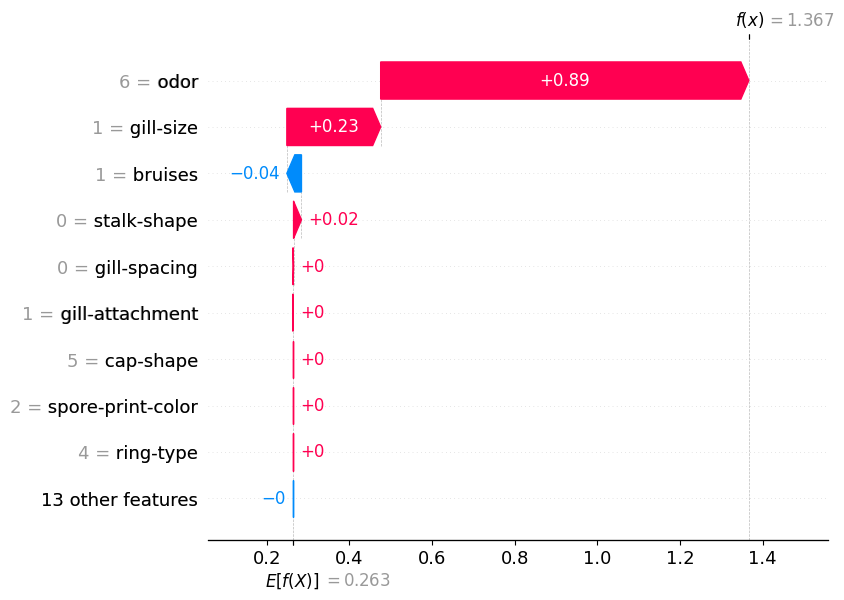

In [6]:
explainer.waterfall(shap_values[0])

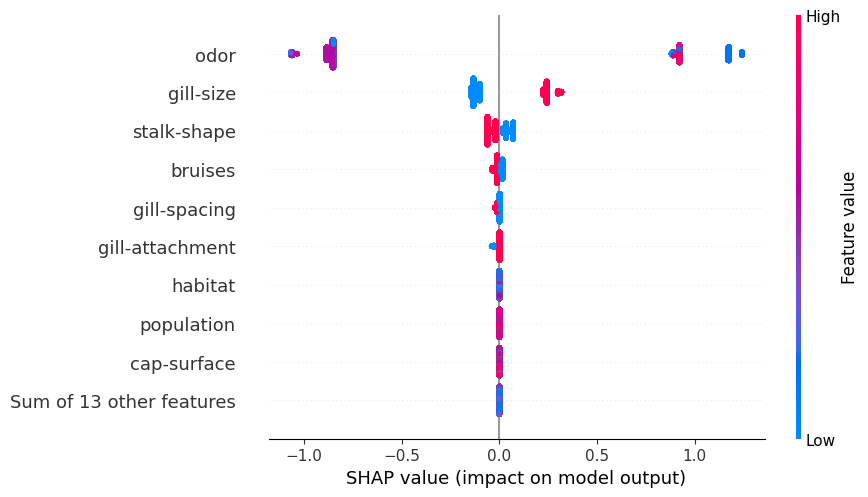

In [7]:
explainer.beeswarm(shap_values)

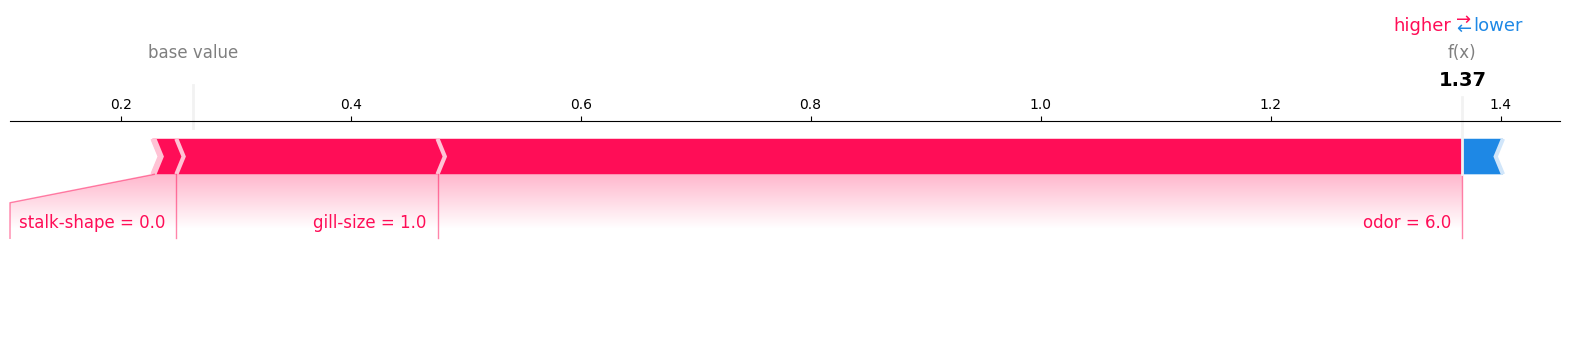

In [14]:
explainer.force(shap_values[0])

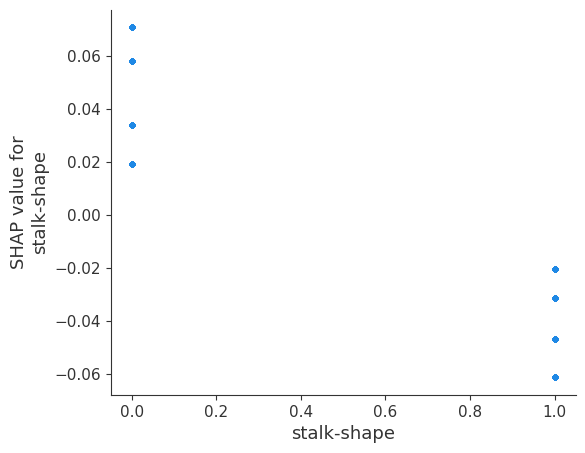

In [39]:
explainer.dependence_plot('stalk-shape', shap_values.values, X)

In [45]:
explainer.plot_interaction_values(X)

could not compute interaction values


Traceback (most recent call last):
  File "/home/nir/projects/beam_dev/beamds/src/beam/explainability/shap_explainer.py", line 77, in get_interaction_values
    return self.explainer.shap_interaction_values(X)
  File "/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py", line 569, in shap_interaction_values
    X, y, X_missing, flat_output, tree_limit, _ = self._validate_inputs(X, y, tree_limit, False)
  File "/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py", line 338, in _validate_inputs
    raise ExplainerError(emsg)
shap.utils._exceptions.ExplainerError: The background dataset you provided does not cover all the leaves in the model, so TreeExplainer cannot run with the feature_perturbation="tree_path_dependent" option! Try providing a larger background dataset, no background dataset, or using feature_perturbation="interventional".
